
# Задача 21

In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Мы будем работать с датасетом __"forestfires"__, в котором есть записи погодных измерений для разных лесных массивов и объёмы их выгорания. Последние мы будем предсказываььть

Мы будем работать с датасетом __"forestfires.csv"__, в котором есть записи погодных измерений для разных лесных массивов и объёмы их выгорания. Последние мы будем предсказывать. Данные взяты здесь https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/

### Знакомство с данными

In [2]:
df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Для каждого лесного массива известно:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

Нужно перекодировать месяца и дни недели

In [3]:
for i in range(np.size(df.loc[:, 'month'])):
    if(df.loc[i, 'month'] == 'jan'):
        df.loc[i, 'month'] = 1
    if(df.loc[i, 'month'] == 'feb'):
        df.loc[i, 'month'] = 2
    if(df.loc[i, 'month'] == 'mar'):
        df.loc[i, 'month'] = 3
    if(df.loc[i, 'month'] == 'apr'):
        df.loc[i, 'month'] = 4
    if(df.loc[i, 'month'] == 'may'):
        df.loc[i, 'month'] = 5
    if(df.loc[i, 'month'] == 'jun'):
        df.loc[i, 'month'] = 6
    if(df.loc[i, 'month'] == 'jul'):
        df.loc[i, 'month'] = 7
    if(df.loc[i, 'month'] == 'aug'):
        df.loc[i, 'month'] = 8
    if(df.loc[i, 'month'] == 'sep'):
        df.loc[i, 'month'] = 9
    if(df.loc[i, 'month'] == 'oct'):
        df.loc[i, 'month'] = 10
    if(df.loc[i, 'month'] == 'nov'):
        df.loc[i, 'month'] = 11
    if(df.loc[i, 'month'] == 'dec'):
        df.loc[i, 'month'] = 12
        
for i in range(np.size(df.loc[:, 'day'])):
    if(df.loc[i, 'day'] == 'mon'):
        df.loc[i, 'day'] = 1
    if(df.loc[i, 'day'] == 'tue'):
        df.loc[i, 'day'] = 2
    if(df.loc[i, 'day'] == 'wed'):
        df.loc[i, 'day'] = 3
    if(df.loc[i, 'day'] == 'thu'):
        df.loc[i, 'day'] = 4
    if(df.loc[i, 'day'] == 'fri'):
        df.loc[i, 'day'] = 5
    if(df.loc[i, 'day'] == 'sat'):
        df.loc[i, 'day'] = 6
    if(df.loc[i, 'day'] == 'sun'):
        df.loc[i, 'day'] = 7

Визуализируем данные снова

In [4]:
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Посмотрим на графиках, как целевой признак зависит от остальных

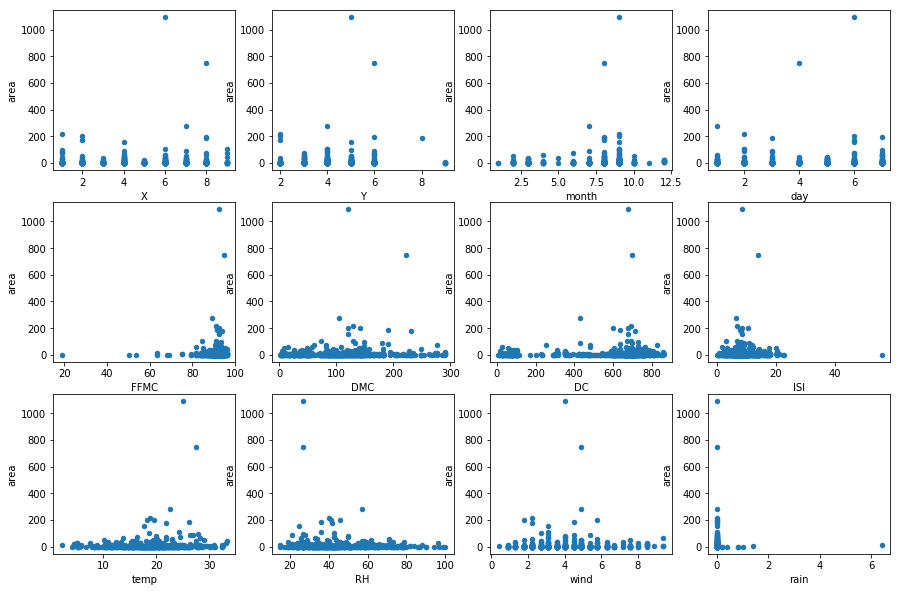

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "area", subplots=True, kind="scatter", ax=axes[int(idx / 4), idx % 4])

In [6]:
import sklearn
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [50]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["area"].as_matrix()
X

array([[ 1.87353718,  0.56986043, -0.64905878, ..., -0.63111291,
         0.26950853, -0.07326831],
       [-0.28952383,  0.56986043, -2.8480325 , ...,  3.41754939,
        -1.74175564, -0.07326831],
       [ 1.00831277,  1.38372188, -0.20926404, ...,  2.80411571,
         2.00143046,  0.60315519],
       ...,
       [ 1.44092498,  1.38372188,  0.23053071, ..., -0.93782975,
        -1.23893959, -0.07326831],
       [ 0.57570057,  0.56986043,  0.67032545, ...,  0.04366414,
        -0.51264975, -0.07326831],
       [ 0.57570057,  0.56986043,  0.23053071, ...,  1.0865014 ,
         0.77232458, -0.07326831]])

In [51]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

Построим график зависимости весов признаков от параметра регуляризации

In [9]:
alphas = np.arange(0.1,10.1,0.2)
i = 0
lasso_coefs = np.zeros((alphas.shape[0], X.shape[1]))

for alpha in alphas:
    lasso_regression = linear_model.Lasso(alpha = alpha)
    lasso_regression.fit(X, y)
#     print(np.std(lasso_regression.predict(X) - y))
    lasso_coefs[i, :] = lasso_regression.coef_
    i = i + 1


Text(0.5,1,'Lasso')

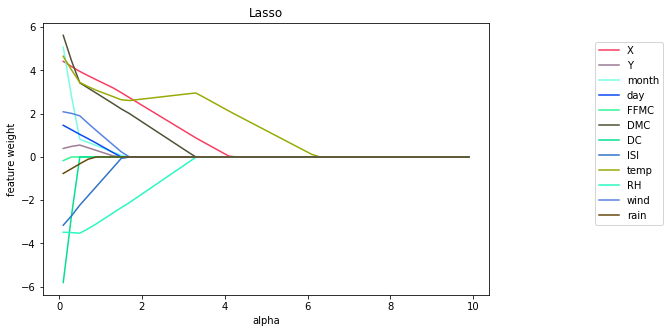

In [10]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(lasso_coefs.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

Нарисуем график общей ошибки на кросс-валидации при изменении параметра регуляризации.

In [11]:
from sklearn.linear_model import LassoCV

Text(0,0.5,'average MSE')

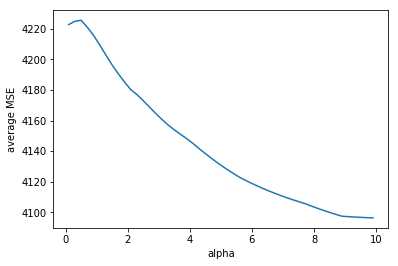

In [12]:
lassoCV_regression = linear_model.LassoCV(alphas = alphas)
lassoCV_regression.fit(X,y)
y_alph = np.mean(lassoCV_regression.mse_path_, axis = 1)
x_alph = np.array(lassoCV_regression.alphas_)
plt.plot(x_alph, y_alph)
plt.xlabel("alpha")
plt.ylabel("average MSE")

Нарисуем график зависимости величины среднеквадратичной ошибки в зависимости от числа признаков на обучении и контроле.

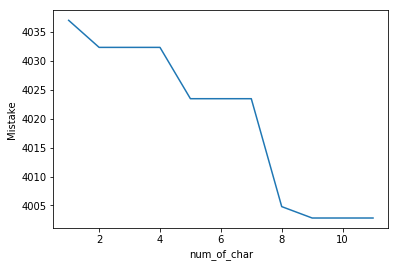

In [58]:
num_of_char = np.arange(1, 12, 1)
square_mistake = []
for i, j in zip(range(-11, 0), range(0, 11)):
    X = scale(df_shuffled[df_shuffled.columns[:i]])
    lasso_regression = linear_model.Lasso(alpha = 3)
    lasso_regression.fit(X, y)
    predicted = lasso_regression.predict(X)
    square_mistake.append(np.sum((y - predicted)**2)/517)


square_mistake = np.array(square_mistake)
plt.plot(num_of_char, square_mistake)
plt.xlabel("num_of_char")
plt.ylabel("Mistake")
plt.savefig('image.pdf')